<a href="https://colab.research.google.com/github/lincentpega/course-work-2022/blob/main/Car_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.simplefilter('ignore')

# увеличиваем дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Jupyter Notebooks/Course-work-2022/Car evaluate/car.data", sep=',')

data.columns = ['buying', 'maint','doors', 'persons', 'lug_boot', 'safety', 'class']
data_copy = data.copy()

data_new = pd.get_dummies(data, columns=['buying', 'maint','doors', 'persons', 'lug_boot', 'safety', 'class'])
data_new.head()
data_new['class_vgood'].value_counts()


0    1662
1      65
Name: class_vgood, dtype: int64

In [ ]:
# for i in data.columns:
#     le = preprocessing.LabelEncoder().fit(data[i])
#     data[i] = le.transform(data[i])
#     print(i, list(le.classes_))

# scaler = preprocessing.MinMaxScaler()
# names = data.columns
# d = scaler.fit_transform(data)

# scaled_df = pd.DataFrame(d, columns=names)
# scaled_df.head()

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def deriv_tanh(x):
    return 1 - np.square(np.tanh(x))

def deriv_sigmoid(x):
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y, y_hat):
  return ((y - y_hat) ** 2).mean()

def logloss(y, a):
  return -(y*np.log(a) + (1-y)*np.log(1-a))

def d_logloss(y, a):
    return (a - y)/(a*(1 - a))

class Layer:

    activationFunctions = {
        'tanh': (tanh, deriv_tanh),
        'sigmoid': (sigmoid, deriv_sigmoid)
    }
    learning_rate = 0.1

    def __init__(self, inputs, neurons, activation):
        self.W = np.random.randn(neurons, inputs)
        self.b = np.zeros((neurons, 1))
        self.act, self.d_act = self.activationFunctions.get(activation)

    def feedforward(self, A_prev):
        self.A_prev = A_prev
        self.Z = np.dot(self.W, self.A_prev) + self.b
        self.A = self.act(self.Z)
        return self.A

    def backprop(self, dA):
        dZ = np.multiply(self.d_act(self.Z), dA)
        dW = 1/dZ.shape[1] * np.dot(dZ, self.A_prev.T)
        db = 1/dZ.shape[1] * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(self.W.T, dZ)

        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return dA_prev

In [ ]:
arr = np.array(data_new)
X = arr[:,:-4]
Y = arr[:,-4:]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
x_train = x_train.T
y_train = y_train.T

m = x_train.shape[1]
epochs = 3000

In [ ]:
layers = [Layer(21, 17, 'tanh'), Layer(17, 8, 'tanh'), Layer(8, 5, 'tanh'), Layer(5, 4, 'sigmoid')]
#  layers = [Layer(21, 25, 'sigmoid'), Layer(25, 10, 'sigmoid'), Layer(10, 4, 'sigmoid')]
costs = [] # to plot graph 

for epoch in range(epochs):
    # Feedforward

    A = x_train
    for layer in layers:
        A = layer.feedforward(A)
    # Calulate cost to plot graph
    cost = 1/m * np.sum(logloss(y_train, A))
    costs.append(cost)

    # Backpropagation
    dA = d_logloss(y_train, A)
    for layer in reversed(layers):
        dA = layer.backprop(dA)


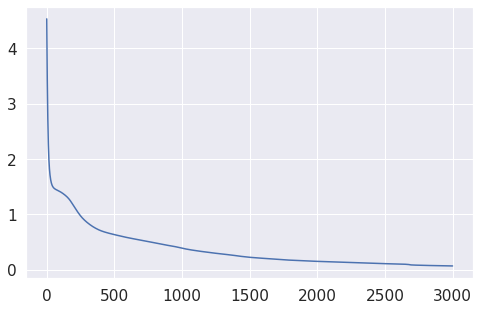

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), costs)

In [ ]:
x_test = x_test.T
m = x_test[1]

# Making predictions
A = x_test
for layer in layers:
    A = layer.feedforward(A)
A = np.around(A) # округление, чтобы получить one hote code

y_cap = A.T.copy()

accuracy =  0.9263157894736842


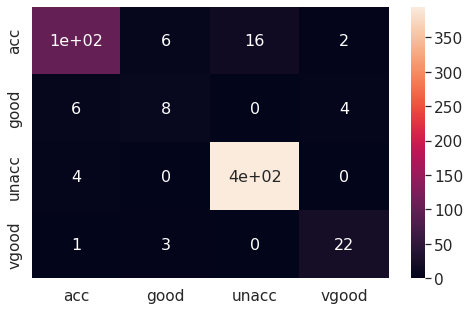

In [ ]:
from sklearn import metrics
lb = preprocessing.LabelBinarizer()
lb.fit([1, 2, 3, 4])

y_cap_integerized = lb.inverse_transform(y_cap)
y_test_integerized = lb.inverse_transform(y_test)

conf_matrix = metrics.confusion_matrix(y_test_integerized, y_cap_integerized)

sum_true = 0
sum_false = 0
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        if i == j:
            sum_true += conf_matrix[i][j]
        else: sum_false += conf_matrix[i][j]

accuracy = sum_true / (sum_false + sum_true)
print('accuracy = ', accuracy) 

df_cm = pd.DataFrame(conf_matrix, ['acc', 'good', 'unacc', 'vgood'], ['acc', 'good', 'unacc', 'vgood'])
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()
